<a href="https://colab.research.google.com/github/Czrvillareal/activities/blob/main/lab2_titanic_villareal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Data Cleaning
  - What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

  1. Decomposition
    - What exactly is a clean data?
      - What is the format for a clean data?
      - What should be changed in this data?
    - Are there missing values?
      - What should be done with the missing values?
      - What columns should be removed?
      - What columns should be filled?
    - Will all the columns be used?
      - Which columns have a use for prediciting survival?
      - What columns relate to each other?

  2. Pattern Recognition
    - Some columns are unnecessary:
      - PassengerId, has nothing to do with the survival rate, even without it, the total number of passengers can be counted, an identifier.
      - Cabin, the amount of missing data is more than a half, it cannot be used.
    - Some columns are useful but:
      - Some of the age columns are missing, but unlike the stated 2 columns, age is a good factor about survivability, can be filled.
      - Columns like SibSp, Parch, and Ticket can be used to group data however, this level is too complex.

  3. Abstraction
    - Focus on cleaning the dataset by handling missing values, removing irrelevant columns, and ensuring data types are correct.
    - No further analysis will be performed.
    
  4. Algorithm
      1. Load the dataset.
      2. Inspect the dataset for structure and content.
      3. Identify missing values and decide whether to fill or remove them.
      4. Fill Age using median and Fill Embarked using mode; drop PassengerId and Cabin.
      5. Remove duplicates.
      6. Change datatype of Pclass, Survived, and Embarked to category.
      7. Change Fare decimal places to hundreths (two places).
      8. Standardize column names by changing to lower cases.
      9. Standardize Name column by removing extra spaces and fixing capitalizations.
      10. Reorder columns to display data better, survived -> pclass -> sex -> age -> ticket -> fare -> name -> sibSp -> parch.
      11. Upload cleaned dataset as titanic_cleaned.csv.

### Step 1: Load the Data and Imports
  - Use Pandas to load the dataset into a DataFrame.
  - Prepare Matplot for later steps.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Czrvillareal/activities/refs/heads/main/datasets/titanic.csv")

### Step 2: Understand the Data
  - Use basic functions to understand the structure of the dataset.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


  - Age is a float data type. Age isn't normally counted with months, but this is probably for the sake of accuracy when handling data.
  - The data types of alphanumeric are actually object type in pandas instead of the usual string type.
  - Survived and Pclass, is using int data type instead of category data type.

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  - Here we can see the basic structure of the dataset

### Step 3: Check for Missing Values

In [79]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


  - There are three columns with missing values namely: Age, Cabin, and Embarked, missing values are 177, 687, and 2 respectively.
  

### Step 4: Handle Missing Values and Unnecessary Columns
  - Common options:
      1. Remove rows/columns, (Cabin & PassengerId)
      2. or fill in values. (Age & Embarked)

In [80]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [81]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [82]:
df.drop(columns=["PassengerId","Cabin"], inplace=True)

### Step 4.1: Verify Changes

In [83]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Step 5: Remove Duplicates
  - Check for duplicates
  - Remove duplicates

In [84]:
df.duplicated().sum()

0

In [85]:
df.drop_duplicates(inplace=True)

### Step 6: Fix Data Types
  - Convert Survived and Pclass to categorical

In [86]:
df["Survived"] = df["Survived"].astype("category")

In [87]:
df["Pclass"] = df["Pclass"].astype("category")

In [88]:
df["Embarked"] = df["Embarked"].astype("category")

### Step 6.1: Verify Changes

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 51.8+ KB


### Step 7: Change Fare decimal places to hundreths.

In [91]:
df['Fare'] = df['Fare'].round(2)

### Step 7.1: Verify Changes

In [92]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


### Step 8: Standardize Column Names
  - Convert all column names to lowercase

In [93]:
df.columns = df.columns.str.lower()

### Step 8.1: Verify Changes

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    category
 1   pclass    891 non-null    category
 2   name      891 non-null    object  
 3   sex       891 non-null    object  
 4   age       891 non-null    float64 
 5   sibsp     891 non-null    int64   
 6   parch     891 non-null    int64   
 7   ticket    891 non-null    object  
 8   fare      891 non-null    float64 
 9   embarked  891 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 51.8+ KB


### Step 9: Standardize Name column by removing extra spaces and fixing capitalizations
  - fixing inconsistent formats should've been fixed right here.
  - Titles are not consistent. (Miss, Ms., Mister, Mr. ...)

In [95]:
df['name'] = df['name'].str.strip().str.title()

### Step 10: Reorder columns

In [100]:
column_order = ['survived', 'pclass', 'sex', 'age', 'embarked', 'ticket', 'fare', 'name', 'sibsp', 'parch']
df = df[column_order].sort_values(by=['survived', 'pclass', 'sex','embarked'], ascending=[False, True, True,True])

In [101]:
df.head()

,survived,pclass,sex,age,embarked,ticket,fare,name,sibsp,parch
1,1,1,female,38.0,C,PC 17599,71.28,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
31,1,1,female,28.0,C,PC 17569,146.52,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,0
52,1,1,female,49.0,C,PC 17572,76.73,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,0
194,1,1,female,44.0,C,PC 17610,27.72,"Brown, Mrs. James Joseph (Margaret Tobin)",0,0
195,1,1,female,58.0,C,PC 17569,146.52,"Lurette, Miss. Elise",0,0


### Step 11: Save the Cleaned Dataset


In [102]:
df.to_csv("titanic_cleaned.csv", index=False)

#Question 2

Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

## Survivors and Non-Survivors

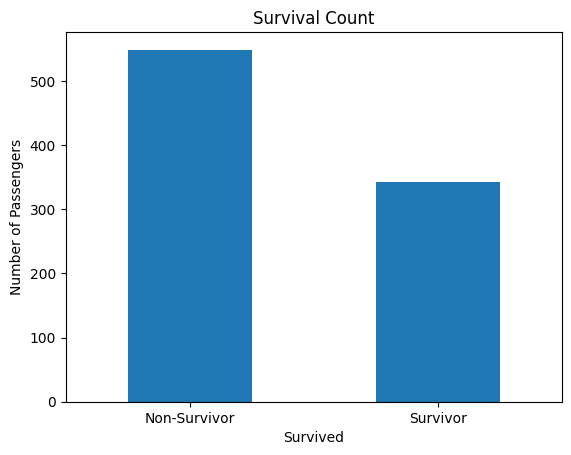

In [107]:
ax = df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Survivor', 'Survivor'], rotation=0)
plt.show()

In [116]:
df['survived'].value_counts()

,count
survived,
0,549
1,342


## Analysis 1: Survival Count and Gender

In [114]:
df.groupby(['survived', 'sex'], observed=True).size()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

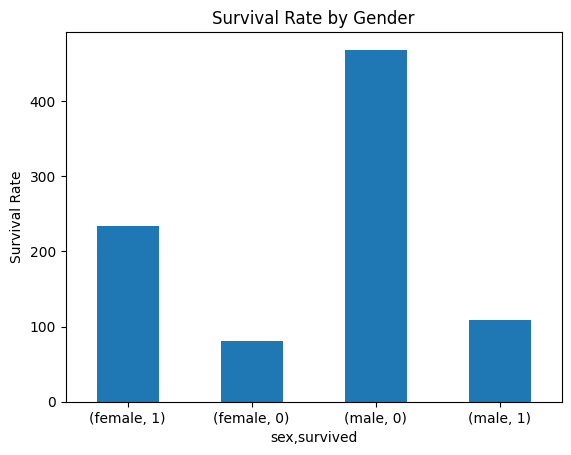

In [124]:
df.groupby("sex")["survived"].value_counts().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

 - As we can observe in the graph alone, that there are more deaths than Survivors.
 - If we further inspect, the amount of males who died are incomparable to females who died.
 - 233/314 survived in females, and 109/577 survived in males.
 - We can assume that, priority were given to female than male.

## Analysis 2: Pclass and Survival

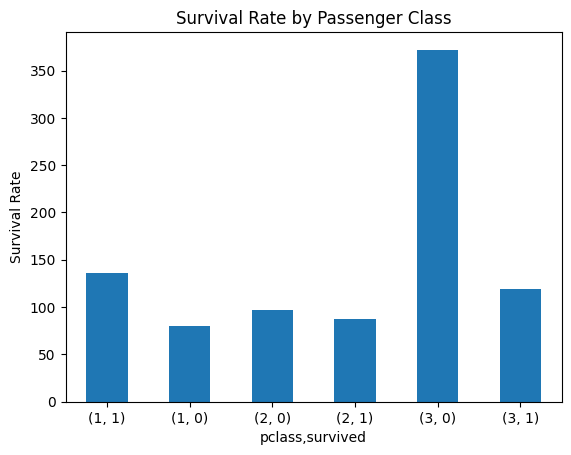

In [127]:
df.groupby("pclass", observed=True)["survived"].value_counts().plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

In [130]:
df.groupby(['survived', 'pclass'], observed=True).size()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [138]:
ratio = (df.groupby(['survived', 'pclass'], observed=True).size() / df['pclass'].value_counts())
print((ratio * 100).round(2).astype(str) + '%')

survived  pclass
0         1         37.04%
          2         52.72%
          3         75.76%
1         1         62.96%
          2         47.28%
          3         24.24%
dtype: object


In [142]:
print(pd.crosstab(df['pclass'], df['sex']))

sex     female  male
pclass              
1           94   122
2           76   108
3          144   347


  - Here we can observe how those in the 1st Class down to 3rd Class, their survival rate, wherein, the better the passenger class, the higher chance they lived.
  - We can also assume that they were given more priority.
  - We can further observe if three columns were used if pclass and sex actually affected survival rate or they're two different topics.

### Reflection
  - Tickets could've been used to group and observe if those tickets gave positions
  - If members were grouped, other variables like who were prioritized in each group.
  - I couldn't handle age, or create age groups.
  - There were things that I could've fixed, like the names.